결측값때문에 행의 개수가 달라짐 -> 결측값 처리가 우선시 되어야 함 -> interpolate 를 통해 선형 보간 해줌

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
dangjin_fcst = pd.read_csv('data/dangjin_fcst_data.csv') # 당진시 기상예보 데이터
dangjin_obs = pd.read_csv('data/dangjin_obs_data.csv') # 당진시 기상관측 데이터
energy = pd.read_csv('data/energy.csv') # 에너지 발생량 데이터 (여기에서는 dangjin 컬럼의 데이터를 사용)

In [3]:
dangjin_obs_df = dangjin_obs.copy()
dnagjin_fcst_df = dangjin_fcst.copy()

In [4]:
# dangjin_obs[dangjin_obs['일시'].dt.hour==14]
dangjin_obs_df['일시'] = pd.to_datetime(dangjin_obs['일시'])
dangjin_obs_df[dangjin_obs_df['일시'].dt.hour==11]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
11,129,서산,2018-03-01 11:00:00,0.5,9.1,320.0,58.0,NaN
35,129,서산,2018-03-02 11:00:00,-0.7,1.4,250.0,29.0,NaN
59,129,서산,2018-03-03 11:00:00,9.1,0.7,160.0,23.0,NaN
83,129,서산,2018-03-04 11:00:00,11.8,1.0,340.0,93.0,NaN
107,129,서산,2018-03-05 11:00:00,6.1,5.5,20.0,73.0,NaN
...,...,...,...,...,...,...,...,...
25517,129,서산,2021-01-27 11:00:00,3.7,2.7,360.0,31.0,2.0
25541,129,서산,2021-01-28 11:00:00,1.6,5.8,290.0,88.0,8.0
25565,129,서산,2021-01-29 11:00:00,-5.0,2.5,20.0,51.0,2.0
25589,129,서산,2021-01-30 11:00:00,4.6,3.2,180.0,75.0,9.0


In [5]:
dangjin_obs_df[3480:3500] # dangjin_obs_data 의 일시 2018-7-24 11:00 ~ 16:00 행이 없음 (index 3490, 3491 사이), 그래서 energy_df 와 행 개수가 6개 차이남

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3480,129,서산,2018-07-24 00:00:00,25.1,0.4,0.0,93.0,NaN
3481,129,서산,2018-07-24 01:00:00,25.7,0.3,0.0,89.0,NaN
3482,129,서산,2018-07-24 02:00:00,25.0,0.4,0.0,96.0,NaN
3483,129,서산,2018-07-24 03:00:00,25.0,0.7,90.0,95.0,NaN
3484,129,서산,2018-07-24 04:00:00,24.4,0.1,0.0,98.0,NaN
3485,129,서산,2018-07-24 05:00:00,24.4,1.2,70.0,98.0,NaN
3486,129,서산,2018-07-24 06:00:00,24.0,0.1,0.0,97.0,NaN
3487,129,서산,2018-07-24 07:00:00,25.7,0.0,0.0,90.0,NaN
3488,129,서산,2018-07-24 08:00:00,28.6,0.2,0.0,76.0,NaN
3489,129,서산,2018-07-24 09:00:00,29.9,1.7,290.0,73.0,NaN


In [6]:
# 삽입할 데이터를 만들어줌
new_data = dangjin_obs_df[:6].copy()
new_data['일시'] = ['2018-07-24 11:00:00', '2018-07-24 12:00:00', '2018-07-24 13:00:00', '2018-07-24 14:00:00', '2018-07-24 15:00:00', '2018-07-24 16:00:00']
new_data['기온(°C)'] = pd.Series()
new_data['풍속(m/s)'] = pd.Series()
new_data['풍향(16방위)'] = pd.Series()
new_data['습도(%)'] = pd.Series()
new_data['전운량(10분위)'] = pd.Series()
new_data

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to s

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-07-24 11:00:00,NaN,NaN,NaN,NaN,NaN
1,129,서산,2018-07-24 12:00:00,NaN,NaN,NaN,NaN,NaN
2,129,서산,2018-07-24 13:00:00,NaN,NaN,NaN,NaN,NaN
3,129,서산,2018-07-24 14:00:00,NaN,NaN,NaN,NaN,NaN
4,129,서산,2018-07-24 15:00:00,NaN,NaN,NaN,NaN,NaN
5,129,서산,2018-07-24 16:00:00,NaN,NaN,NaN,NaN,NaN


In [7]:
idx = 3491 # 중간에 삽입할 index값
temp1 = dangjin_obs_df[dangjin_obs_df.index < idx].copy()
temp2 = dangjin_obs_df[dangjin_obs_df.index >= idx].copy()
dangjin_obs_df = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)
dangjin_obs_df[3480:3510]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3480,129,서산,2018-07-24 00:00:00,25.1,0.4,0.0,93.0,NaN
3481,129,서산,2018-07-24 01:00:00,25.7,0.3,0.0,89.0,NaN
3482,129,서산,2018-07-24 02:00:00,25.0,0.4,0.0,96.0,NaN
3483,129,서산,2018-07-24 03:00:00,25.0,0.7,90.0,95.0,NaN
3484,129,서산,2018-07-24 04:00:00,24.4,0.1,0.0,98.0,NaN
3485,129,서산,2018-07-24 05:00:00,24.4,1.2,70.0,98.0,NaN
3486,129,서산,2018-07-24 06:00:00,24.0,0.1,0.0,97.0,NaN
3487,129,서산,2018-07-24 07:00:00,25.7,0.0,0.0,90.0,NaN
3488,129,서산,2018-07-24 08:00:00,28.6,0.2,0.0,76.0,NaN
3489,129,서산,2018-07-24 09:00:00,29.9,1.7,290.0,73.0,NaN


In [8]:
dangjin_obs_df[dangjin_obs_df.isnull().any(axis=1)].head(30)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN
5,129,서산,2018-03-01 05:00:00,4.1,4.4,270.0,97.0,NaN
6,129,서산,2018-03-01 06:00:00,3.5,7.9,320.0,93.0,NaN
7,129,서산,2018-03-01 07:00:00,2.2,6.4,290.0,86.0,NaN
8,129,서산,2018-03-01 08:00:00,1.0,7.7,320.0,82.0,NaN
9,129,서산,2018-03-01 09:00:00,0.3,8.9,320.0,71.0,NaN


In [9]:
dangjin_obs_df.describe()

,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,25632.0,25589.000000,25590.000000,25590.000000,25591.000000,21656.000000
mean,129.0,12.947657,1.901407,162.146151,72.926791,5.261636
std,0.0,10.163573,1.544590,133.924277,20.379724,3.805230
min,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,129.0,4.700000,0.700000,20.000000,57.000000,1.000000
50%,129.0,13.500000,1.500000,180.000000,76.000000,6.000000
75%,129.0,21.500000,2.800000,290.000000,92.000000,9.000000
max,129.0,36.800000,11.700000,360.000000,99.000000,10.000000


In [10]:
dangjin_obs[dangjin_obs['전운량(10분위)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
23411,129,서산,2020-10-31 17:00,15.6,1.2,200.0,52.0,NaN
23751,129,서산,2020-11-14 21:00,7.9,0.6,20.0,89.0,NaN
23752,129,서산,2020-11-14 22:00,6.9,0.0,0.0,92.0,NaN
23918,129,서산,2020-11-21 20:00,8.6,0.1,0.0,77.0,NaN


In [11]:
dangjin_obs_df.isnull().sum()

지점              0
지점명             0
일시              0
기온(°C)         43
풍속(m/s)        42
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3976
dtype: int64

In [12]:
dangjin_obs_df[dangjin_obs_df['풍속(m/s)'].isnull()]
dangjin_obs_df[10950:11000]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
10950,129,서산,2019-05-31 06:00:00,14.4,0.2,0.0,96.0,9.0
10951,129,서산,2019-05-31 07:00:00,16.8,0.1,0.0,75.0,8.0
10952,129,서산,2019-05-31 08:00:00,18.2,1.5,250.0,64.0,3.0
10953,129,서산,2019-05-31 09:00:00,19.6,2.3,230.0,50.0,2.0
10954,129,서산,2019-05-31 10:00:00,20.6,2.3,230.0,44.0,1.0
10955,129,서산,2019-05-31 11:00:00,21.7,2.7,180.0,44.0,1.0
10956,129,서산,2019-05-31 12:00:00,22.2,4.1,230.0,50.0,3.0
10957,129,서산,2019-05-31 13:00:00,22.1,4.4,230.0,49.0,6.0
10958,129,서산,2019-05-31 14:00:00,21.0,4.8,250.0,51.0,3.0
10959,129,서산,2019-05-31 15:00:00,21.8,4.0,230.0,50.0,1.0


In [13]:
ts = dangjin_obs_df['풍속(m/s)'].copy()
ts_intp_linear = ts.interpolate()  # ts.interpolote() 는 default 가 interpolate(method='values')로 선형으로 비례하여 결측값을 보간해줌
ts_intp_linear[10950:11000] # 10959~10961, 10964~10972 가 보간해준 결측값 (꽤 자연스러운 값으로 보간 됨)

10950    0.20
10951    0.10
10952    1.50
10953    2.30
10954    2.30
10955    2.70
10956    4.10
10957    4.40
10958    4.80
10959    4.00
10960    4.70
10961    3.90
10962    3.10
10963    4.40
10964    3.00
10965    2.30
10966    1.60
10967    0.90
10968    0.20
10969    0.60
10970    0.73
10971    0.86
10972    0.99
10973    1.12
10974    1.25
10975    1.38
10976    1.51
10977    1.64
10978    1.77
10979    1.90
10980    2.70
10981    2.60
10982    3.20
10983    3.20
10984    3.40
10985    2.50
10986    2.40
10987    1.10
10988    1.60
10989    1.10
10990    1.20
10991    1.40
10992    0.50
10993    1.20
10994    0.10
10995    0.60
10996    0.60
10997    0.20
10998    0.00
10999    0.40
Name: 풍속(m/s), dtype: float64

In [14]:
# 결측값 보간 방법 참고 : https://rfriend.tistory.com/264 , https://eda-ai-lab.tistory.com/14
dangjin_obs_df['풍속(m/s)'] = dangjin_obs_df['풍속(m/s)'].interpolate() # 풍속(m/s) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['풍속(m/s)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [15]:
dangjin_obs_df['기온(°C)'] = dangjin_obs_df['기온(°C)'].interpolate() # 기온(°C) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['기온(°C)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [16]:
dangjin_obs_df['풍향(16방위)'] = dangjin_obs_df['풍향(16방위)'].interpolate() # 풍향(16방위) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['풍향(16방위)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [17]:
dangjin_obs_df['습도(%)'] = dangjin_obs_df['습도(%)'].interpolate() # 습도(%) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['습도(%)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [18]:
# dangjin_itp = pd.read_csv('data/석문면_하늘상태_201803_201807.csv')
# dangjin_itp['value location:53_114 Start : 20180301 '][:3324]
# dangjin_itp[dangjin_itp['value location:53_114 Start : 20180301 '].isnull()]

In [19]:
# # dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate().copy() # 전운량(10분위) 열의 결측값을 보간해줌
# # dangjin_nan = dangjin_obs_df[dangjin_obs_df['전운량(10분위)'].isnull()].copy() # 전운량 은 왜 결측값 보간이 안되는 행이 있지? - 보간에 활용할 이전 데이터가 없어서 보간이 안된듯...
# # # 그럼 보간에 활용할 데이터는 어떻게 입력해주지?? -> 석문면_하늘상태_201803_201807.csv 파일의 value 데이터 값을 활용해보자
# dangjin_obs_df['전운량(10분위)'][:3324] = dangjin_itp['value location:53_114 Start : 20180301 '][:3324]
# dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate() # 석문면_하늘상태_201803_201807.csv 파일에도 결측값이 4개 존재하므로 interpolate 를 통해 결측값을 보간해줌
# dangjin_obs_df[dangjin_obs_df['전운량(10분위)'].isnull()]

In [20]:
dangjin_obs_df.isnull().sum() # 결측값 보간 완료

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)         0
풍향(16방위)        0
습도(%)           0
전운량(10분위)    3976
dtype: int64

In [21]:
dangjin_obs_df.describe() #  energy 데이터와 같은 행 개수(25632개)로 맞추기

,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,25632.0,25632.000000,25632.000000,25632.000000,25632.000000,21656.000000
mean,129.0,12.958400,1.901477,162.213639,72.939880,5.261636
std,0.0,10.166409,1.543788,133.858753,20.375591,3.805230
min,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,129.0,4.700000,0.700000,20.000000,58.000000,1.000000
50%,129.0,13.600000,1.500000,180.000000,76.000000,6.000000
75%,129.0,21.500000,2.800000,290.000000,92.000000,9.000000
max,129.0,36.800000,11.700000,360.000000,99.000000,10.000000


In [22]:
# 0행이 3월 1일 11시에 발표한 15시 예보, 18행이 3월 1일 11시에 발표한 3월 3일 21시 예보
# Forecast time 은 string
# forecast 는 numpy float64
dangjin_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


forecast 데이터에서 Forecast time과 forecast를 조합하여 일시 열과 대칭될 수 있는 데이터를 만들어보자

In [23]:
# 예보 시간 컬럼의 데이터 타입을 datetime으로 변경함
dangjin_fcst['Forecast_time'] = pd.to_datetime(dangjin_fcst['Forecast time'])

In [24]:
dangjin_fcst.head(30)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0,2018-03-01 11:00:00
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 11:00:00
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 11:00:00
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0,2018-03-01 11:00:00
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0,2018-03-01 11:00:00
5,2018-03-01 11:00:00,19.0,-5.0,60.0,4.3,344.0,1.0,2018-03-01 11:00:00
6,2018-03-01 11:00:00,22.0,-2.0,55.0,2.0,345.0,1.0,2018-03-01 11:00:00
7,2018-03-01 11:00:00,25.0,1.0,45.0,0.8,256.0,1.0,2018-03-01 11:00:00
8,2018-03-01 11:00:00,28.0,3.0,50.0,2.3,270.0,1.0,2018-03-01 11:00:00
9,2018-03-01 11:00:00,31.0,1.0,55.0,1.9,264.0,1.0,2018-03-01 11:00:00


In [25]:
# 기상청에서는 하루 3시간 간격으로 8회 예보함
# 여기서는 14시 예보만을 사용함
fcst_14 = dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==14]

In [26]:
fcst_14

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
20,2018-03-01 14:00:00,4.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 14:00:00
21,2018-03-01 14:00:00,7.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 14:00:00
22,2018-03-01 14:00:00,10.0,-2.0,55.0,6.7,336.0,1.0,2018-03-01 14:00:00
23,2018-03-01 14:00:00,13.0,-4.0,55.0,5.5,339.0,1.0,2018-03-01 14:00:00
24,2018-03-01 14:00:00,16.0,-5.0,60.0,4.3,344.0,1.0,2018-03-01 14:00:00
...,...,...,...,...,...,...,...,...
162094,2021-02-28 14:00:00,46.0,4.0,50.0,5.8,344.0,1.0,2021-02-28 14:00:00
162095,2021-02-28 14:00:00,49.0,5.0,50.0,5.9,333.0,1.0,2021-02-28 14:00:00
162096,2021-02-28 14:00:00,52.0,3.0,60.0,4.1,311.0,1.0,2021-02-28 14:00:00
162097,2021-02-28 14:00:00,55.0,1.0,80.0,1.7,329.0,1.0,2021-02-28 14:00:00


In [27]:
# 다음 날의 기상 예보가 필요하여 예보시간 기준 10시간 후(00:00)부터 33시간 후(23:00) 데이터만 사용함
fcst_14 = fcst_14[(fcst_14['forecast']>=10)<=33]

In [28]:
fcst_14

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
20,2018-03-01 14:00:00,4.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 14:00:00
21,2018-03-01 14:00:00,7.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 14:00:00
22,2018-03-01 14:00:00,10.0,-2.0,55.0,6.7,336.0,1.0,2018-03-01 14:00:00
23,2018-03-01 14:00:00,13.0,-4.0,55.0,5.5,339.0,1.0,2018-03-01 14:00:00
24,2018-03-01 14:00:00,16.0,-5.0,60.0,4.3,344.0,1.0,2018-03-01 14:00:00
...,...,...,...,...,...,...,...,...
162094,2021-02-28 14:00:00,46.0,4.0,50.0,5.8,344.0,1.0,2021-02-28 14:00:00
162095,2021-02-28 14:00:00,49.0,5.0,50.0,5.9,333.0,1.0,2021-02-28 14:00:00
162096,2021-02-28 14:00:00,52.0,3.0,60.0,4.1,311.0,1.0,2021-02-28 14:00:00
162097,2021-02-28 14:00:00,55.0,1.0,80.0,1.7,329.0,1.0,2021-02-28 14:00:00


In [29]:
# 예보 시점에 focast를 더하여 예보 시각을 구함
def to_date(x):
    return pd.DateOffset(hours=x)

fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)

D:\Anaconda\envs\data_engeneering\lib\site-packages\pandas\core\arrays\datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [30]:
fcst_14

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
20,2018-03-01 14:00:00,4.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 18:00:00
21,2018-03-01 14:00:00,7.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 21:00:00
22,2018-03-01 14:00:00,10.0,-2.0,55.0,6.7,336.0,1.0,2018-03-02 00:00:00
23,2018-03-01 14:00:00,13.0,-4.0,55.0,5.5,339.0,1.0,2018-03-02 03:00:00
24,2018-03-01 14:00:00,16.0,-5.0,60.0,4.3,344.0,1.0,2018-03-02 06:00:00
...,...,...,...,...,...,...,...,...
162094,2021-02-28 14:00:00,46.0,4.0,50.0,5.8,344.0,1.0,2021-03-02 12:00:00
162095,2021-02-28 14:00:00,49.0,5.0,50.0,5.9,333.0,1.0,2021-03-02 15:00:00
162096,2021-02-28 14:00:00,52.0,3.0,60.0,4.1,311.0,1.0,2021-03-02 18:00:00
162097,2021-02-28 14:00:00,55.0,1.0,80.0,1.7,329.0,1.0,2021-03-02 21:00:00


In [31]:
fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

In [32]:
fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
20,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
21,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
22,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
23,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
24,2018-03-02 06:00:00,-5.0,60.0,4.3,344.0,1.0
...,...,...,...,...,...,...
162094,2021-03-02 12:00:00,4.0,50.0,5.8,344.0,1.0
162095,2021-03-02 15:00:00,5.0,50.0,5.9,333.0,1.0
162096,2021-03-02 18:00:00,3.0,60.0,4.1,311.0,1.0
162097,2021-03-02 21:00:00,1.0,80.0,1.7,329.0,1.0


In [33]:
# 태양광 발전량 예측은 1시간 간격으로 해야하지만 예보는 3시간 간격으로 나옴
# 간단한 선형보간법을 활용하여 비어있는 값을 채움
# 우선 한시간 간격의 데이터프레임을 생성함
fcst_14_ = pd.DataFrame()
fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

In [34]:
fcst_14_

,Forecast_time
0,2018-03-02 00:00:00
1,2018-03-02 01:00:00
2,2018-03-02 02:00:00
3,2018-03-02 03:00:00
4,2018-03-02 04:00:00
...,...
26299,2021-03-01 19:00:00
26300,2021-03-01 20:00:00
26301,2021-03-01 21:00:00
26302,2021-03-01 22:00:00


In [35]:
# 기존 예보 데이터프레임과 병합함
fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')

In [36]:
fcst_14_ # 중간 값들이 NaN으로 비어있음

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
38355,2021-03-02 12:00:00,4.0,50.0,5.8,344.0,1.0
38356,2021-03-02 15:00:00,5.0,50.0,5.9,333.0,1.0
38357,2021-03-02 18:00:00,3.0,60.0,4.1,311.0,1.0
38358,2021-03-02 21:00:00,1.0,80.0,1.7,329.0,1.0


In [37]:
inter_fcst_14 = fcst_14_.interpolate() # interpolate 를 통해 선형보간해줌

In [38]:
inter_fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,55.000000,6.7,336.000000,1.0
1,2018-03-02 01:00:00,-2.666667,55.000000,6.3,337.000000,1.0
2,2018-03-02 02:00:00,-3.333333,55.000000,5.9,338.000000,1.0
3,2018-03-02 03:00:00,-4.000000,55.000000,5.5,339.000000,1.0
4,2018-03-02 04:00:00,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...
38355,2021-03-02 12:00:00,4.000000,50.000000,5.8,344.000000,1.0
38356,2021-03-02 15:00:00,5.000000,50.000000,5.9,333.000000,1.0
38357,2021-03-02 18:00:00,3.000000,60.000000,4.1,311.000000,1.0
38358,2021-03-02 21:00:00,1.000000,80.000000,1.7,329.000000,1.0


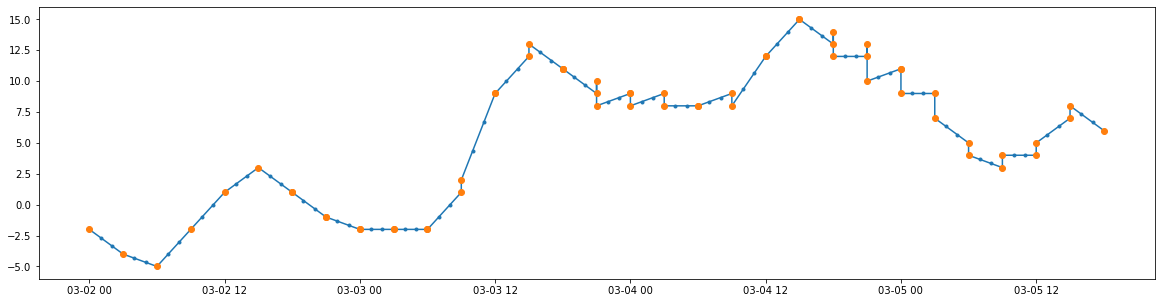

In [39]:
# 보간 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
days = 5
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Temperature'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Temperature'], 'o')

In [40]:
dangjin_obs_df

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


In [41]:
energy.head(40)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


In [42]:
energy_df = energy.copy()

In [43]:
temp_dangjin_obs_df = dangjin_obs_df[24:].reset_index(drop=True) # forecast 데이터를 3월 2일부터 사용하기 때문에 obs 데이터에서도 하루를 생략
temp_dangjin_obs_df['일시'] = pd.to_datetime(temp_dangjin_obs_df['일시']) # 일시열의 데이터를 object 타입에서 to_datetime 타입으로 변경
inter_fcst_14.rename(columns={'Forecast_time' : '일시'}, inplace=True) # Forecast_time열의 이름을 일시로 변경
drop_inter_fcst_14 = inter_fcst_14.drop_duplicates('일시').reset_index(drop=True) # 일시열의 중복된 행 중 첫번째만 남기고 제거
dangjin_obs_fcst_df = pd.merge(temp_dangjin_obs_df, drop_inter_fcst_14, on='일시') # temp_dangjin_obs_df 와 drop_inter_fcst_14 를 '일시' 열을 기준으로 합병

In [44]:
dangjin_obs_fcst_df.head(480)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN,-2.000000,55.000000,6.700000,336.000000,1.0
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN,-2.666667,55.000000,6.300000,337.000000,1.0
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN,-3.333333,55.000000,5.900000,338.000000,1.0
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN,-4.000000,55.000000,5.500000,339.000000,1.0
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN,-4.333333,56.666667,5.100000,340.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,129,서산,2018-03-21 19:00:00,0.5,2.3,20.0,98.0,NaN,2.000000,90.000000,3.266667,28.333333,4.0
476,129,서산,2018-03-21 20:00:00,0.6,2.3,20.0,98.0,NaN,2.000000,90.000000,2.733333,33.666667,4.0
477,129,서산,2018-03-21 21:00:00,0.6,2.5,20.0,98.0,NaN,2.000000,90.000000,2.200000,39.000000,4.0
478,129,서산,2018-03-21 22:00:00,0.6,2.2,20.0,98.0,NaN,1.333333,90.000000,4.166667,23.666667,4.0


In [45]:
temp_energy_df = energy_df['dangjin'][23:].copy().reset_index(drop=True)
dangjin_obs_fcst_energy_df = pd.merge(dangjin_obs_fcst_df, temp_energy_df, left_index=True, right_index=True) # dangjin_obs_fcst_df 와 energy_df['dangjin'] 을 합병

In [46]:
dangjin_obs_fcst_energy_df.head(10)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN,-2.000000,55.000000,6.700000,336.000000,1.0,0
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN,-2.666667,55.000000,6.300000,337.000000,1.0,0
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN,-3.333333,55.000000,5.900000,338.000000,1.0,0
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN,-4.000000,55.000000,5.500000,339.000000,1.0,0
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN,-4.333333,56.666667,5.100000,340.666667,1.0,0
5,129,서산,2018-03-02 05:00:00,-5.1,0.8,70.0,59.0,NaN,-4.666667,58.333333,4.700000,342.333333,1.0,0
6,129,서산,2018-03-02 06:00:00,-6.3,0.6,360.0,75.0,NaN,-5.000000,60.000000,4.300000,344.000000,1.0,0
7,129,서산,2018-03-02 07:00:00,-7.1,0.3,0.0,83.0,NaN,-4.000000,58.333333,3.533333,344.333333,1.0,0
8,129,서산,2018-03-02 08:00:00,-5.7,0.8,200.0,76.0,NaN,-3.000000,56.666667,2.766667,344.666667,1.0,4
9,129,서산,2018-03-02 09:00:00,-3.2,1.0,230.0,53.0,NaN,-2.000000,55.000000,2.000000,345.000000,1.0,154


In [47]:
# date time 사용법
date_time = pd.to_datetime(dangjin_obs_fcst_df['일시'], format='%Y-%m-%d %H:%M')

In [48]:
import platform
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

<Figure size 1440x360 with 0 Axes>

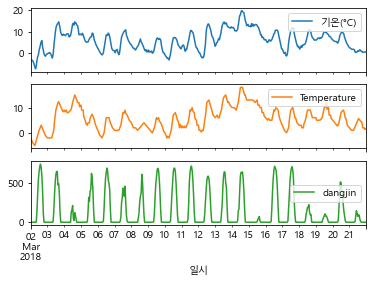

In [58]:
plt.figure(figsize=(20,5))
plot_cols = ['기온(°C)', 'Temperature', 'dangjin'] # 관측 데이터의 기온 / 예보 데이터의 기온 / 태양광 에너지 발생량

plot_features = dangjin_obs_fcst_energy_df[plot_cols][:480] # 20일간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

<Figure size 1440x360 with 0 Axes>

D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


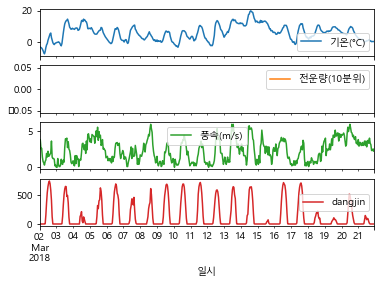

In [50]:
plt.figure(figsize=(20,5))
plot_cols = ['기온(°C)', '전운량(10분위)', '풍속(m/s)', 'dangjin'] # 관측 데이터의 기온 / 관측 데이터의 전운량 / 관측 데이터의 풍속 /태양광 에너지 발생량

plot_features = dangjin_obs_fcst_energy_df[plot_cols][:480] # 20일간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)
plt.show()

In [51]:
dangjin_obs_fcst_energy_df['log_dangjin'] = dangjin_obs_fcst_energy_df.dangjin.apply(np.log1p)

<Figure size 1440x360 with 0 Axes>

D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


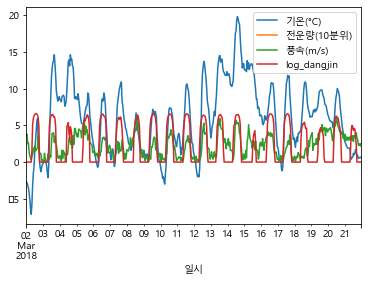

In [52]:
plt.figure(figsize=(20,5))
plot_cols = ['기온(°C)', '전운량(10분위)', '풍속(m/s)', 'log_dangjin'] # 관측 데이터의 기온 / 관측 데이터의 전운량 / 관측 데이터의 풍속 / 태양광 에너지 발생량에 로그를 취한 데이터

plot_features = dangjin_obs_fcst_energy_df[plot_cols][:480] # 20일간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=False)

<Figure size 1440x360 with 0 Axes>

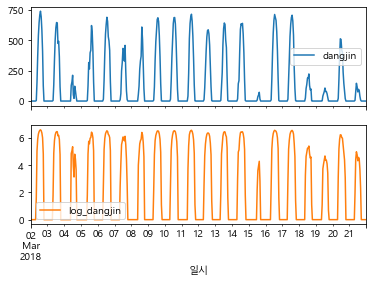

In [53]:
plt.figure(figsize=(20,5))
plot_cols = ['dangjin', 'log_dangjin'] # 태양광 에너지 발생량 / 태양광 에너지 발생량에 로그를 취한 데이터

plot_features = dangjin_obs_fcst_energy_df[plot_cols][:480] # 20일 간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [54]:
X = dangjin_obs_fcst_energy_df.copy()
# X['일시'] = pd.to_datetime(X['일시'])
X = X.drop(['지점', '지점명', '일시'], axis=1)
y = X.pop('dangjin') # 에너지 발생량
log_y = X.pop('log_dangjin') # log 값을 취한 에너지 발생량
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() # 필드를 숫자로 변경해줌

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [55]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features): # MI Score 계산
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [56]:
mi_scores = make_mi_scores(X, y, discrete_features) # 에너지 발생량을 통한 MI Score
mi_scores

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mi_scores = make_mi_scores(X, log_y, discrete_features) # 에너지 발생량에 log를 취했을 때 MI Score
mi_scores

태양광 발전량에는 기온보다 습도의 영향이 더 큰 것 같다  
습도, 기온, 전운량은 관측과 예보가 비슷한 것 같은데 풍향과 풍속은 관측과 예보가 다른 경우가 많은 것 같다

In [ ]:
import seaborn as sns
sns.pairplot(dangjin_obs_fcst_energy_df, vars=['기온(°C)', '습도(%)', '전운량(10분위)'], kind="kde")

In [ ]:
dangjin_obs_fcst_energy_df['month'] = dangjin_obs_fcst_energy_df['일시'].dt.month # 월 값으로 month 열 데이터를 만들어줌
dangjin_obs_fcst_energy_df['hour'] = dangjin_obs_fcst_energy_df['일시'].dt.hour # 시간 값으로 hour 열 데이터를 만들어줌

In [ ]:
dangjin_obs_fcst_energy_df

In [ ]:
def make_dangjin_hour_mean(dataframe):
    res_df = pd.DataFrame(columns=['dangjin_hour_mean'])
    for i in range(24):
        dangjin_hour_mean = dangjin_obs_fcst_energy_df[dangjin_obs_fcst_energy_df['일시'].dt.hour == i]['dangjin'].mean()
        temp = pd.DataFrame(data=[dangjin_hour_mean], columns=['dangjin_hour_mean'])
        res_df = res_df.append(temp)
        
    res_df = res_df.reset_index(drop=True)
    return res_df

def make_dangjin_month_hour_mean(dataframe): # 월별 1시간 단위의 에너지 발생량의 평균값을 만들어줌
    res_df = pd.DataFrame(columns=['dangjin_month_hour_mean'])
    for i in range(1, 13):
        for j in range(24):
            dangjin_month_hour_mean = dangjin_obs_fcst_energy_df[dangjin_obs_fcst_energy_df['일시'].dt.month == i][dangjin_obs_fcst_energy_df['일시'].dt.hour == j]['dangjin'].mean()
            print(dangjin_month_hour_mean)
#             temp = pd.DataFrame(data=[dangjin_month_hour_mean, i, j], columns=['dangjin_month_hour_mean', 'month_', 'hour_'])
            temp = pd.DataFrame({'dangjin_month_hour_mean' : [dangjin_month_hour_mean],
                               'month_' : [i],
                               'hour_' : [j]})
            res_df = res_df.append(temp)
            
    res_df = res_df.reset_index(drop=True)
    return res_df

In [ ]:
dangjin_month_hour_mean = make_dangjin_month_hour_mean(dangjin_obs_fcst_energy_df)

In [ ]:
dangjin_month_hour_mean.info()

In [ ]:
plt.figure(figsize=(12,6))
heatmap_data = pd.pivot_table(dangjin_month_hour_mean, values='dangjin_month_hour_mean', index=['month_'], columns='hour_')
sns.heatmap(heatmap_data) # 기온이 높은 여름(6,7,8월) 보다 봄(3,4월)에 더 높은 에너지 발생량을 보이는 것을 알 수 있다.
plt.show()